This notebook trains and tests an SCA agent on the Laser Hockey Enviroment

In [7]:
# Imports
import numpy as np
import laserhockey.hockey_env as h_env
from importlib import reload
from SAC import Agent
import matplotlib.pyplot as plt
# from gym import wrappers

In [8]:
# Global variables
train_games = 10000 # 720/34min
test_games = 10
load_checkpoint = False
train = True
# render testing
render = False

In [9]:
# Initialization 
np.set_printoptions(suppress=True)
reload(h_env)

# get enviroment
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.NORMAL)

#init agent
agent = Agent(input_dims=env.observation_space.shape, 
              env=env,
              alpha = 0.0005,
              beta = 0.0005,
              gamma = 1,
              n_actions=int(env.action_space.shape[0]/2))

# and oponent
opponent = h_env.BasicOpponent()


In [10]:
# Plotting function
def plot_learning_curve(x, scores, figure_file):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')
    plt.savefig(figure_file)

episode  0 score -11.0 avg_score -11.0
episode  1 score -12.8 avg_score -11.9
episode  2 score 9.1 avg_score -4.9
episode  3 score -21.1 avg_score -9.0
episode  4 score -11.3 avg_score -9.4
episode  5 score -23.8 avg_score -11.8
episode  6 score -11.0 avg_score -11.7
episode  7 score -28.2 avg_score -13.8
episode  8 score -11.1 avg_score -13.5
episode  9 score -11.0 avg_score -13.2
episode  10 score -11.1 avg_score -13.0
episode  11 score -22.2 avg_score -13.8
episode  12 score -11.3 avg_score -13.6
episode  13 score 8.6 avg_score -12.0
episode  14 score -13.1 avg_score -12.1
episode  15 score 8.2 avg_score -10.8
episode  16 score -11.1 avg_score -10.8
episode  17 score -15.3 avg_score -11.1
episode  18 score -12.2 avg_score -11.1
episode  19 score -24.8 avg_score -11.8
episode  20 score -11.2 avg_score -11.8
episode  21 score -14.1 avg_score -11.9
episode  22 score -7.7 avg_score -11.7
episode  23 score 8.4 avg_score -10.9
episode  24 score -10.9 avg_score -10.9
episode  25 score -14.

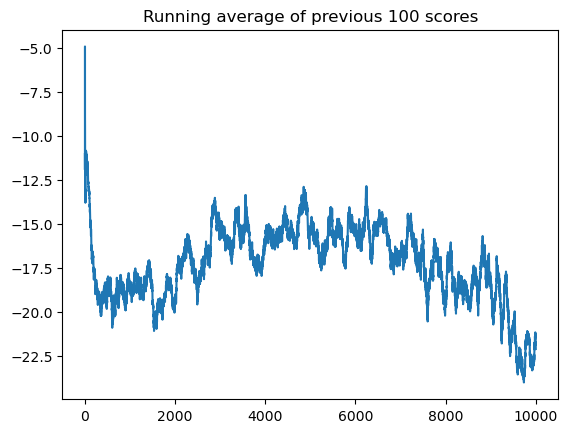

In [11]:
# Training of agent

# uncomment this line and do a mkdir tmp && mkdir video if you want to
# record video of the agent playing the game.
#env = wrappers.Monitor(env, 'tmp/video', video_callable=lambda episode_id: True, force=True)

best_score = env.reward_range[0]
score_history = []

if train:
    # conttinue from checkpoint
    if load_checkpoint:
        agent.load_models()

    for i in range(train_games):
        observation, info = env.reset()
        obs_opponent = env.obs_agent_two()

        done = False
        score = 0

        while not done:
            action1 = agent.act(observation)
            action2 = opponent.act(obs_opponent)
            # print(action1, action2)
            observation_, reward, done, _, info = env.step(np.hstack([action1,action2]))
            # reward = sum(info.values())
            score += reward
            agent.remember(observation, action1, reward, observation_, done)
            
            # learn after buffer is filled 
            if i > 50:
                agent.learn()
                
            obs_opponent = env.obs_agent_two()
            observation = observation_
            
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])
        
        # remember best model after initial fluctuation
        if avg_score > best_score and i > 500:
            best_score = avg_score
            agent.save_models()

        print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

    x = [i+1 for i in range(train_games)]
    plot_learning_curve(x, score_history, 'SCA.png')

In [12]:
# Testing

wins = 0
losses = 0
draws = 0

agent.load_models()
opponent = h_env.BasicOpponent()

for i in range(test_games):
    if render:
        env.render() 
    observation, info = env.reset()
    obs_opponent = env.obs_agent_two()
    done = False
    while not done:
        if render:
            env.render() 
        action1 = agent.act(observation)
        action2 = opponent.act(obs_opponent)

        observation, reward, done, _, info = env.step(np.hstack([action1,action2]))

        obs_opponent = env.obs_agent_two()
    if info['winner']==1:
            wins+=1
    elif info['winner']==-1:
            losses+=1
    else:
        draws+=1
        
wins, losses, draws

.... loading models ....


(2, 0, 8)